# Análise de Features

## Descrição

Esse notebook tem por propósito analisar a distribuição de cada feature e a correlação de cada uma com o score (função objetivo).

## Imports e Leitura dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("../../extracao/datanov2.csv")

In [3]:
data

,edge_simpl,hue_simpl,average_lum,contrast_ratio,hist_width,blur,score
10004473376.jpg,0.001081,7,41.526758,0.000000,0.003876,0.498065,77.383621
10007357496.jpg,0.001082,17,66.373103,0.008127,0.003110,0.495744,68.728571
10007903636.jpg,0.001081,16,54.814935,0.000000,0.003324,0.494343,78.628571
10009096245.jpg,0.001079,17,14.681202,0.000000,0.002972,0.497337,77.243750
100117038.jpg,0.001083,14,77.800492,0.000000,0.003171,0.494853,75.112500
...,...,...,...,...,...,...,...
9984535544.jpg,0.001082,18,39.107523,0.000000,0.002037,0.501049,70.020089
9991658304.jpg,0.001080,14,44.251944,0.000000,0.003891,0.498962,79.337838
9991999836.jpg,0.001080,17,57.842979,0.002332,0.003753,0.499522,78.092437
9995874256.jpg,0.001082,17,62.265024,0.011355,0.003661,0.493174,68.095133


## Plots e Histogramas

### Edge Simplicity


In [4]:
edge_simpl = data[["edge_simpl"]]


In [5]:
edge_simpl = edge_simpl **2

array([[<AxesSubplot:title={'center':'edge_simpl'}>]], dtype=object)

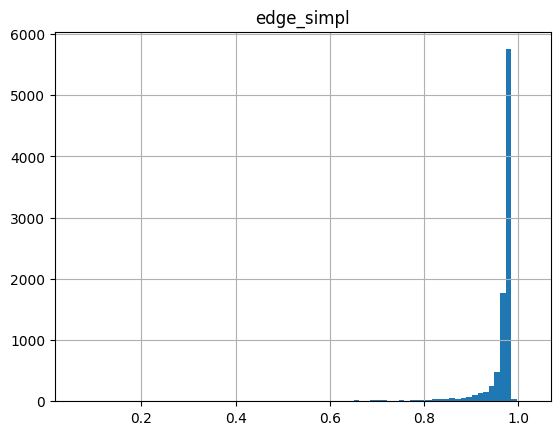

In [6]:
edge_simpl.hist( bins= 80)

array([[<AxesSubplot:title={'center':'edge_simpl'}>]], dtype=object)

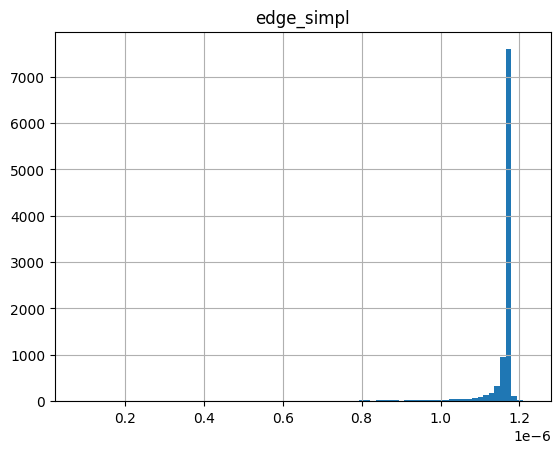

In [6]:
edge_simpl.hist( bins= 80)

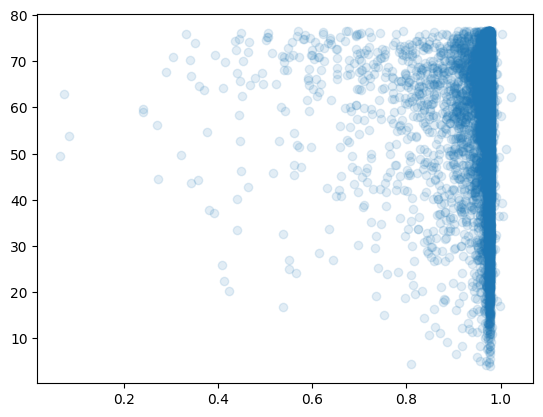

In [7]:
plt.scatter(y=data["score"],x =edge_simpl, alpha=0.125)

### Hue Simplicity

In [8]:
feature = "hue_simpl"

<AxesSubplot:>

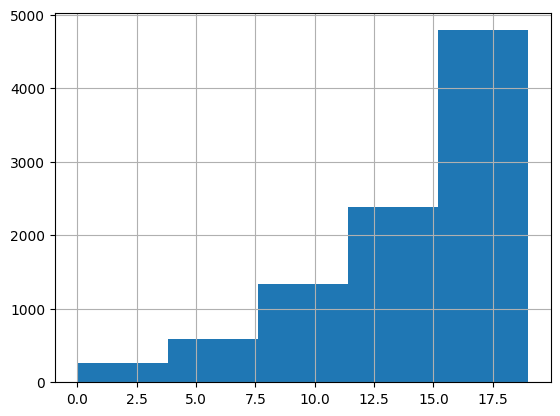

In [9]:
data[feature].hist( bins= 5)

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


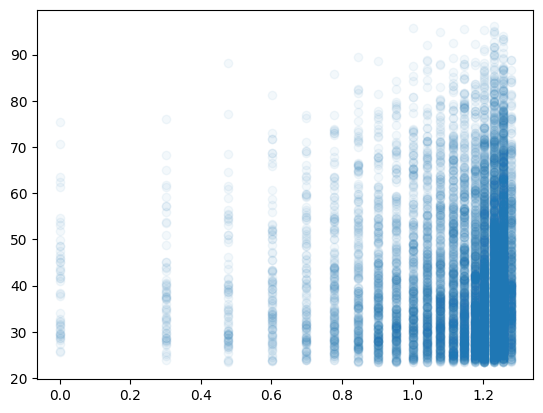

In [10]:
plt.scatter(y=100-data["score"],x =np.log10(data[feature]), alpha=0.05)

## Estatísticas dos dados

Abaixo temos estatísticas de posição das features e do score:

In [11]:
data.describe()

,edge_simpl,hue_simpl,average_lum,contrast_ratio,hist_width,blur,score
count,9349.000000,9349.000000,9349.000000,9349.000000,9349.000000,9349.000000,9349.000000
mean,0.976978,14.157343,44.607939,0.015611,0.827801,0.498695,57.144351
std,0.040025,4.234862,21.387020,0.049906,0.187379,0.006462,14.876310
min,0.253092,0.000000,1.882355,0.000000,0.046875,0.458060,3.911765
25%,0.984212,12.000000,26.865833,0.000000,0.746094,0.496722,48.047297
50%,0.987630,16.000000,45.737270,0.000000,0.902344,0.498919,60.959821
75%,0.988607,17.000000,62.044762,0.008225,0.972656,0.500797,69.026316
max,1.010742,19.000000,89.704538,0.620022,0.992188,0.572941,76.660256


In [7]:
data.describe()

,edge_simpl,hue_simpl,average_lum,contrast_ratio,hist_width,blur,score
count,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000
mean,0.001071,14.087561,45.261248,0.014932,0.003399,0.498686,58.729617
std,0.000044,4.156595,21.172676,0.048479,0.000643,0.006485,15.432433
min,0.000283,0.000000,1.881522,0.000000,0.000521,0.455504,3.911765
25%,0.001080,12.000000,28.055609,0.000000,0.003186,0.496759,49.247768
50%,0.001081,15.000000,46.421272,0.000000,0.003676,0.498952,62.354369
75%,0.001082,17.000000,62.363196,0.007732,0.003860,0.500788,70.712500
max,0.001106,19.000000,89.700541,0.621497,0.003891,0.574385,88.388889


In [8]:
import seaborn as sns

In [ ]:
sns.pairplot(data, kind="kde")

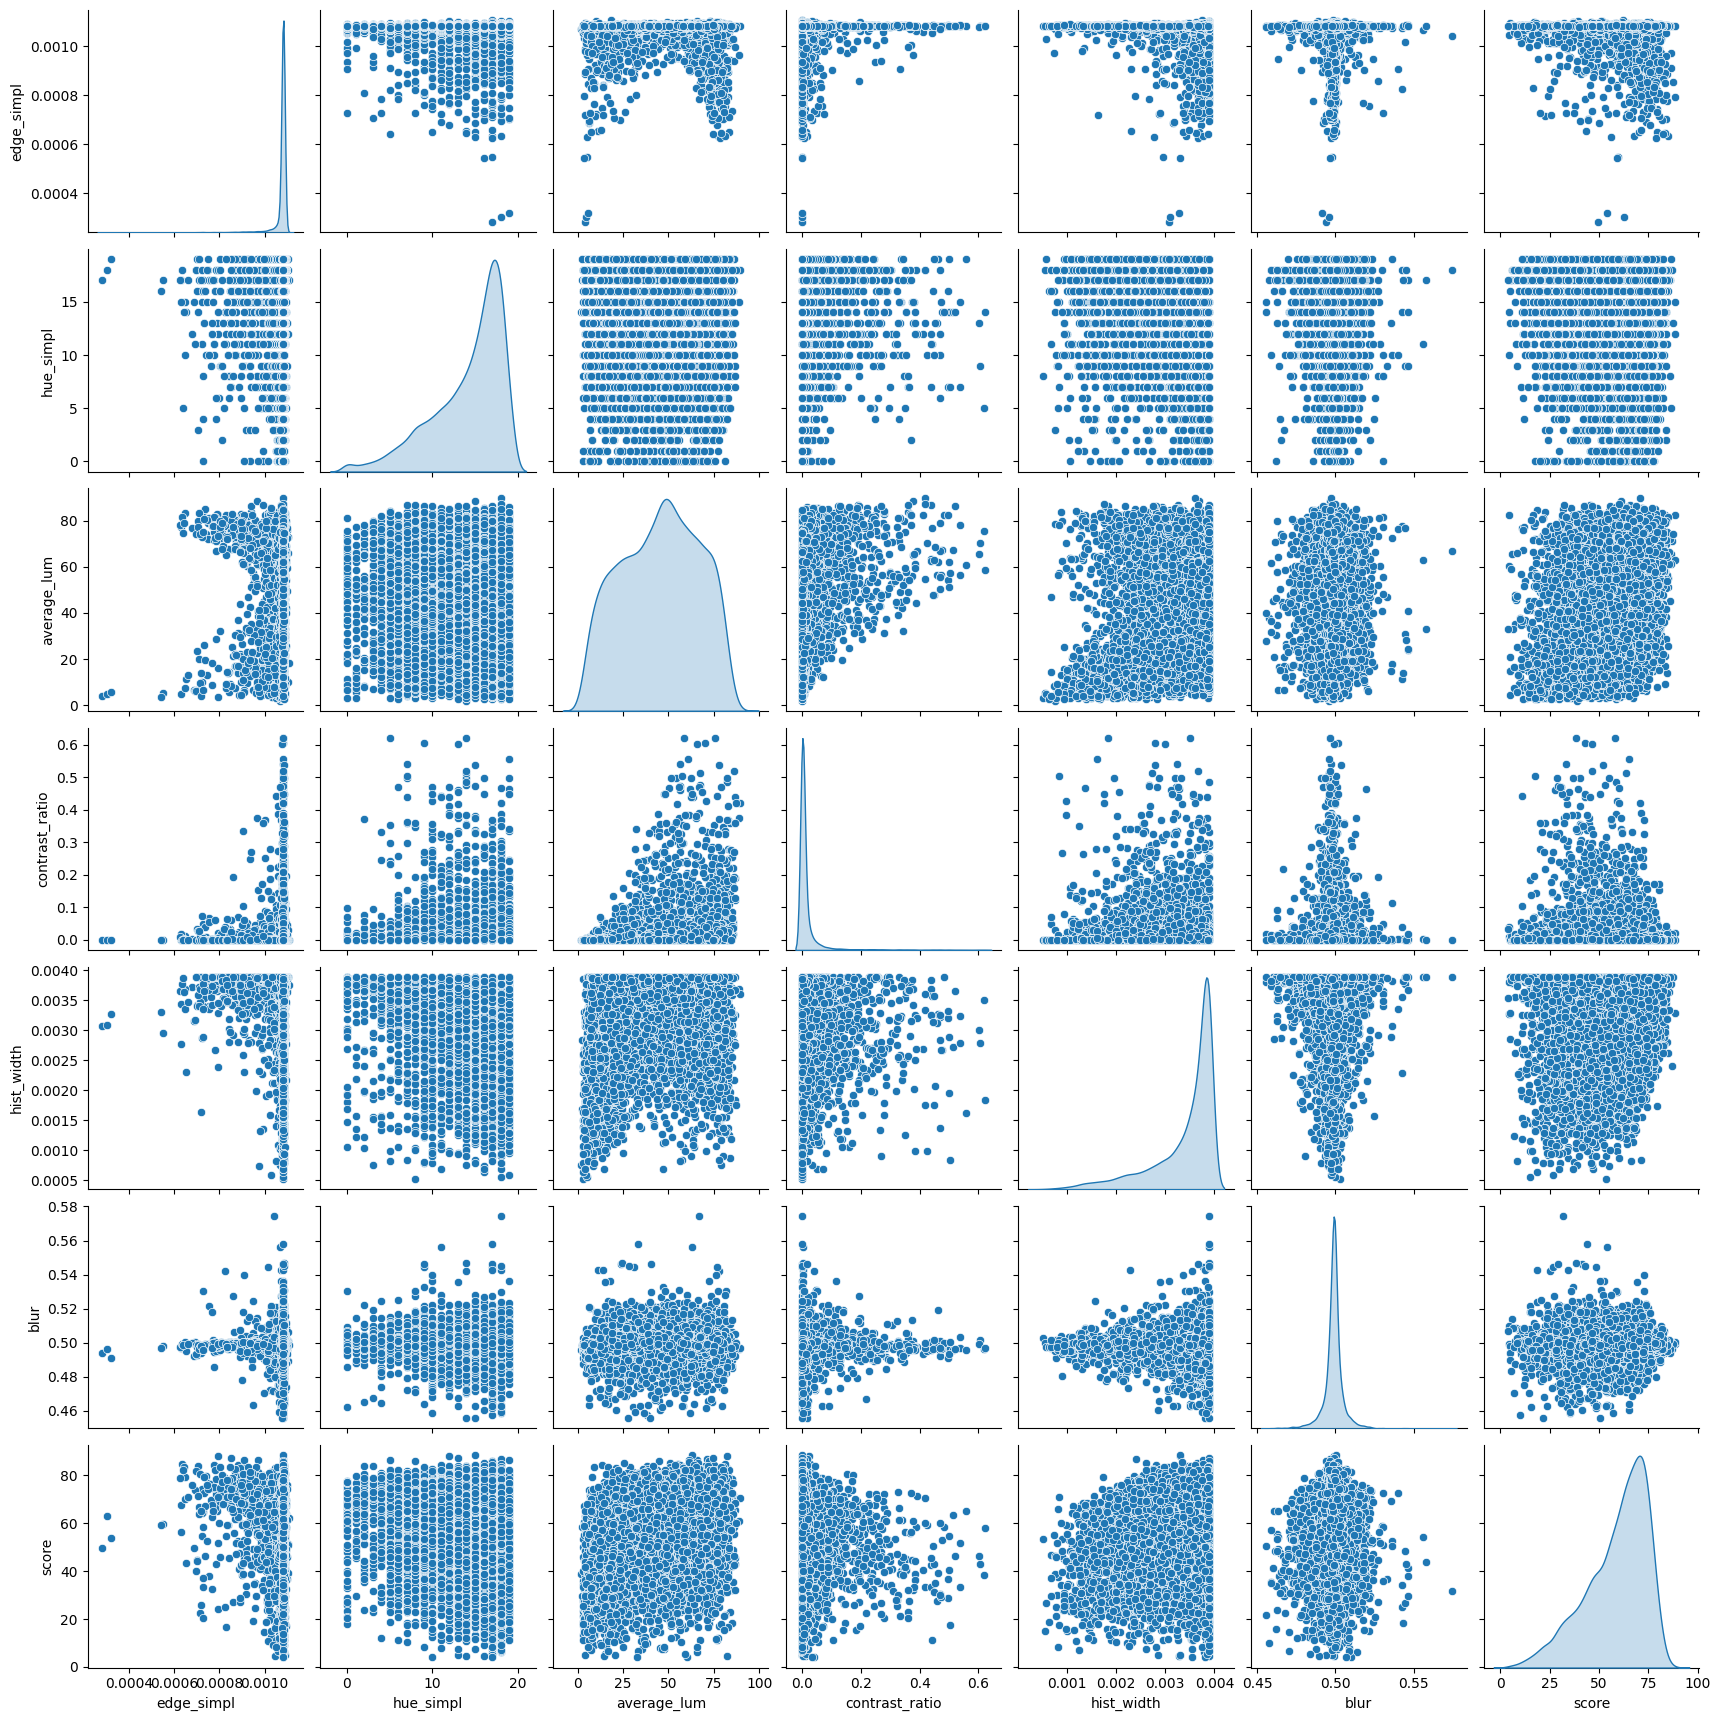

In [9]:
sns.pairplot(data, diag_kind="kde")

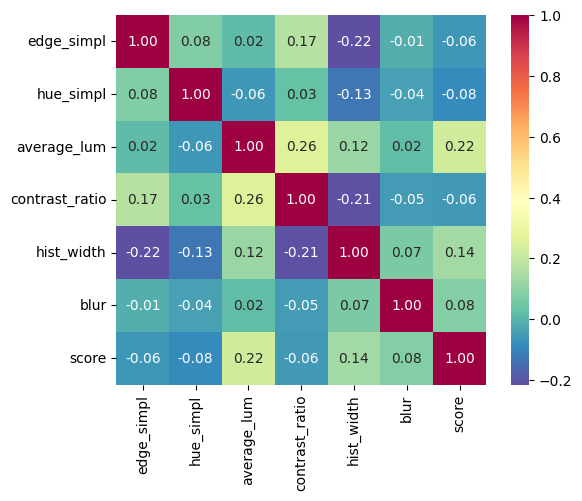

In [13]:
corrmat = data.corr(method="kendall")
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data.columns, 
                 xticklabels=data.columns, 
                 cmap="Spectral_r")
plt.show()

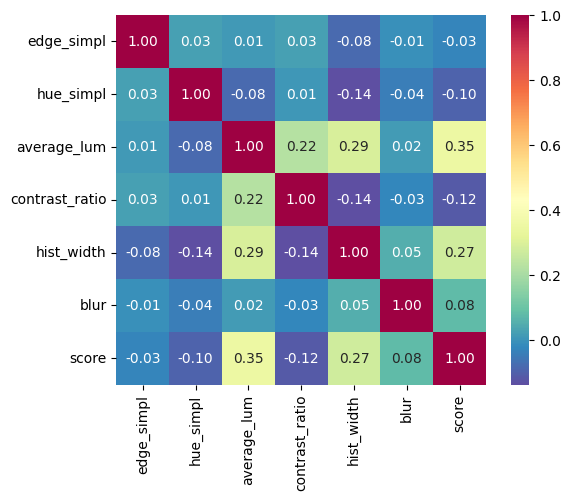

In [16]:
corrmat = data.corr(method="pearson")
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data.columns, 
                 xticklabels=data.columns, 
                 cmap="Spectral_r")
plt.show()